In [1185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats as st
import tabulate

## Reading Top Soccer Players Stats vs Market Value

In [1186]:
df = pd.read_excel('player_stats_value.xlsx')
df


,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Understanding Value distribution vs #Players in that range

Text(0, 0.5, '#Players')

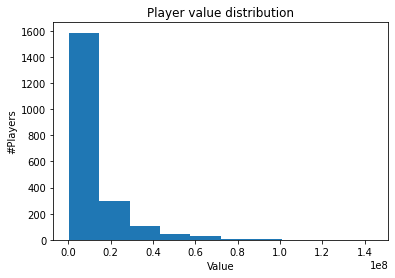

In [1187]:
plt.hist(df['Value'])
plt.title(label="Player value distribution")
plt.xlabel(xlabel="Value")
plt.ylabel(ylabel="#Players")

Now I´m going to focus on the 20/21 Season stats only

In [1188]:
df_2021_2020 = df.iloc[:, :143]
df_2021_2020

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Matis Carvalho,Montpellier HSC,22,Goalkeeper,Portugal,180000,1,Ligue 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,Lorenzo Andrenacci,Genoa CFC,26,Goalkeeper,Italy,135000,3,Serie A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,Mamadou Doucoure,Borussia Mönchengladbach,23,Defender,France,90000,3,Bundesliga,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Michael Langer,FC Schalke 04,36,Goalkeeper,Austria,90000,1,Bundesliga,Schalke 04,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,NaN


Only selecting quantitative variables from the 2020/2021 season

In [1189]:
df3 = df_2021_2020.iloc[:,10:143]
df3['Age'] = df_2021_2020['Age']
df3['Contract Years Left'] = df_2021_2020['Contract Years Left']
df3['Value'] = df_2021_2020['Value']
df3['Contract Years Left'].to_csv('file.csv')

Found some values in the 'Contract Years Left' column with errors, so we´ll leave those rows outside of the analysis

In [1190]:
rslt_df = df3.loc[df3['Contract Years Left'] != 'fail']
rslt_df

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),...,Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21),Age,Contract Years Left,Value
0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,5.0,0.0,...,4.0,0.0,0.0,109.0,7.0,8.0,46.7,22,1,144000000
1,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,2.0,0.0,...,0.0,0.0,0.0,96.0,37.0,40.0,48.1,21,3,117000000
2,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,1.0,0.0,...,2.0,0.0,0.0,155.0,90.0,129.0,41.1,28,3,108000000
3,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,154.0,5.0,22.0,18.5,21,5,90000000
4,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.0,0.0,...,2.0,0.0,0.0,191.0,21.0,52.0,28.8,29,2,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,1,180000
2071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,3,135000
2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,3,90000
2073,2.0,239.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,NaN,36,1,90000


In [1191]:
rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)
rslt_df.dtypes

C:\Users\camil\AppData\Local\Temp\ipykernel_14616\527357103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['Contract Years Left'] = rslt_df['Contract Years Left'].astype(int)


Starts (20/21)                                                                float64
Min (20/21)                                                                   float64
Total Mins/90 (20/21)                                                         float64
Gls (20/21)                                                                   float64
Ast (20/21)                                                                   float64
Non-Penalty Goals (20/21)                                                     float64
Penalties Scored (20/21)                                                      float64
Penalties Attempted (20/21)                                                   float64
Yellow Cards (20/21)                                                          float64
Red Cards (20/21)                                                             float64
Gls/90 (20/21)                                                                float64
Ast/90 (20/21)                                        

Analyzing the Dataframe and searching for non real values

In [1192]:
rslt_df.applymap(np.isreal).all(1)

0       True
1       True
2       True
3       True
4       True
        ... 
2070    True
2071    True
2072    True
2073    True
2074    True
Length: 2030, dtype: bool

Running correlation matrix for the 2020/2021 season stats and value

In [1193]:
corr = rslt_df.corr()
corr
##sb.heatmap(corr)

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),Red Cards (20/21),...,Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21),Age,Contract Years Left,Value
Starts (20/21),1.000000,0.992860,0.992860,0.316626,0.365920,0.314668,0.186377,0.191588,0.475768,0.130125,...,0.165243,0.228726,0.152669,0.816238,0.461555,0.450391,0.090286,0.164522,0.154264,0.337256
Min (20/21),0.992860,1.000000,0.999996,0.306045,0.356860,0.303682,0.181733,0.187110,0.469835,0.120387,...,0.153987,0.231769,0.155883,0.820763,0.469550,0.449483,0.094241,0.157246,0.162765,0.340036
Total Mins/90 (20/21),0.992860,0.999996,1.000000,0.306059,0.356779,0.303711,0.181688,0.187069,0.469768,0.120442,...,0.154087,0.231742,0.155778,0.820783,0.469528,0.449437,0.094151,0.157221,0.162878,0.339977
Gls (20/21),0.316626,0.306045,0.306059,1.000000,0.542839,0.974445,0.653881,0.662096,0.063637,-0.000661,...,0.452895,-0.118795,-0.069195,0.019618,0.213383,0.489513,-0.201898,0.051905,0.088132,0.444811
Ast (20/21),0.365920,0.356860,0.356779,0.542839,1.000000,0.527406,0.360210,0.366183,0.121058,-0.008217,...,0.293348,-0.071869,-0.073009,0.195290,0.041227,0.273091,-0.244304,0.029786,0.109474,0.446802
Non-Penalty Goals (20/21),0.314668,0.303682,0.303711,0.974445,0.527406,1.000000,0.467220,0.484178,0.063065,0.000951,...,0.440745,-0.125329,-0.065967,0.016775,0.228246,0.499392,-0.201434,0.031448,0.098663,0.438059
Penalties Scored (20/21),0.186377,0.181733,0.181688,0.653881,0.360210,0.467220,1.000000,0.975217,0.038059,-0.005805,...,0.298080,-0.045442,-0.050162,0.020717,0.071097,0.244672,-0.115675,0.098376,0.014571,0.275309
Penalties Attempted (20/21),0.191588,0.187110,0.187069,0.662096,0.366183,0.484178,0.975217,1.000000,0.035474,0.001949,...,0.309585,-0.046536,-0.055204,0.018845,0.084886,0.258068,-0.120245,0.113328,0.008388,0.271654
Yellow Cards (20/21),0.475768,0.469835,0.469768,0.063637,0.121058,0.063065,0.038059,0.035474,1.000000,0.261976,...,0.042039,0.226744,0.096742,0.599686,0.420858,0.309617,0.236848,0.063478,0.051099,0.094952
Red Cards (20/21),0.130125,0.120387,0.120442,-0.000661,-0.008217,0.000951,-0.005805,0.001949,0.261976,1.000000,...,0.019681,0.084533,0.067063,0.161605,0.137648,0.078961,0.082919,0.015120,0.022597,0.017236


I´m looking for the variables with the most correlation with 'Value' to build the first model with those variables, applied conditional formating to column so we could appreciate it easier

In [1194]:
corr
value_corr = corr.loc[corr['Value'] > 0]
value_corr = value_corr[['Value']]
value_corr
value_corr.style.applymap(lambda x: 'background-color : red' if x>.5 else ('background-color : orange' if x>.3 else 'background-color : green' if x>.1 else ''))

,Value
Starts (20/21),0.337256
Min (20/21),0.340036
Total Mins/90 (20/21),0.339977
Gls (20/21),0.444811
Ast (20/21),0.446802
Non-Penalty Goals (20/21),0.438059
Penalties Scored (20/21),0.275309
Penalties Attempted (20/21),0.271654
Yellow Cards (20/21),0.094952
Red Cards (20/21),0.017236


Selecting variables with correlation >.49 (found 7), those will be included in the predictive models

In [1195]:
value_corr.nlargest(8,'Value')


,Value
Value,1.000000
Goal Creating Actions (20/21),0.518250
Total Carries in Forward Direction (20/21),0.512980
Number of Times Player was Pass Target (20/21),0.511899
Passes Leading to Goals (20/21),0.509611
Non-penalty xG+ xA (20/21),0.508318
Passes Leading to Shot Attempt (20/21),0.503195
Touches in Attacking Penalty Box (20/21),0.494847


Generated new correlation matrix to see how this independent variables correlate to 'Value'

<AxesSubplot:>

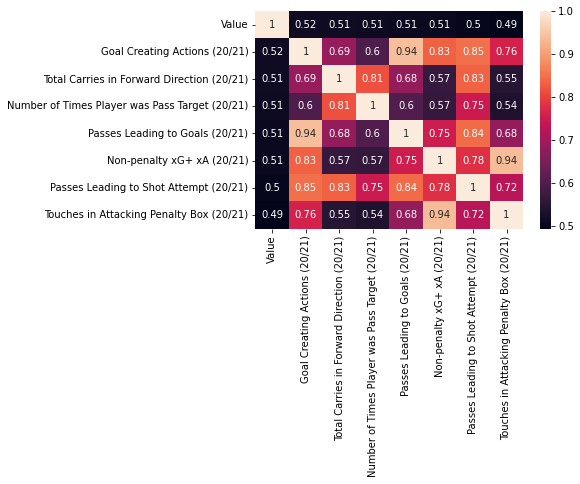

In [1196]:
df3 = df[['Value','Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
df3.corr()
##print(df3.corr())
sb.heatmap(df3.corr(), annot=True)

### Cleaning rows with missing data (NaN)

I only wanted to include players who had every stat filled, this means goalkeepers will be out of this analysis as they don´t have attacking stats to work with.

Selected my dependent variable (y = Value) and my columns for the independent variables (x):
- 'Goal Creating Actions (20/21)'
- 'Total Carries in Forward Direction (20/21)'
- 'Number of Times Player was Pass Target (20/21)'
- 'Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)'
- 'Passes Leading to Shot Attempt (20/21)'
- 'Touches in Attacking Penalty Box (20/21)'

In [1197]:
df_reg = df3.dropna()
y=df_reg[['Value']]
x=df_reg[['Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
df_reg

,Value,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,144000000,28.0,261.0,1616.0,13.0,24.7,69.0,277.0
1,117000000,16.0,79.0,1100.0,10.0,25.9,39.0,190.0
2,108000000,25.0,150.0,1761.0,15.0,24.8,70.0,166.0
3,90000000,22.0,239.0,1693.0,17.0,13.4,87.0,134.0
4,90000000,14.0,218.0,2137.0,10.0,22.6,87.0,313.0
...,...,...,...,...,...,...,...,...
2061,225000,0.0,0.0,37.0,0.0,0.0,0.0,0.0
2062,225000,0.0,15.0,122.0,0.0,1.5,3.0,18.0
2066,225000,0.0,2.0,54.0,0.0,0.0,0.0,0.0
2069,180000,0.0,0.0,76.0,0.0,0.0,1.0,0.0


Decided to work with 90% of the dataframe to train the model and use the 10% remaining to test the fitted model

In [1198]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [1199]:
X_train

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
630,1.0,162.0,1068.0,0.0,2.6,18.0,37.0
464,4.0,117.0,803.0,2.0,2.0,25.0,34.0
14,12.0,223.0,1939.0,7.0,20.9,88.0,283.0
282,2.0,0.0,607.0,2.0,0.1,2.0,0.0
306,17.0,220.0,1708.0,9.0,10.5,78.0,124.0
...,...,...,...,...,...,...,...
851,8.0,36.0,661.0,0.0,8.0,14.0,77.0
1251,2.0,20.0,130.0,2.0,1.4,8.0,10.0
1734,0.0,0.0,264.0,0.0,0.1,1.0,0.0
567,4.0,149.0,1800.0,4.0,2.4,47.0,41.0


In [1200]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

We got a .36 score for our linear regression model considering the top 7 variables correlated to Value, as this score is still low we´re going to try other approaches to increase it.

In [1201]:
regressor.score(X_test,Y_test)

0.36286202662284595

Getting the intercept and the independent variable coefficients to generate the regression equation of the model

In [1202]:
regressor.intercept_

array([174144.49814514])

In [1203]:
array = regressor.coef_
array
df9 = pd.DataFrame(array)
df9= df9.transpose()
df9['coef_'] = df9[0]

In [1204]:
regressor.predict(X_test)
Y_test['Prediction']= regressor.predict(X_test)
Y_test['Error'] = (Y_test['Value']- Y_test['Prediction'])/Y_test['Value']
pd.set_option('display.max_rows', 100)
Y_test.sort_values(by=['Error'], ascending = False)

,Value,Prediction,Error
1859,900000,4.116864e+04,0.954257
1303,3600000,3.146339e+05,0.912602
1638,1800000,1.952179e+05,0.891546
978,5850000,6.518083e+05,0.888580
85,45000000,5.202298e+06,0.884393
...,...,...,...
1858,900000,1.243823e+07,-12.820251
2062,225000,3.187452e+06,-13.166454
1916,720000,1.039636e+07,-13.439395
1725,1350000,2.090168e+07,-14.482727


Text(0, 0.5, '#Players')

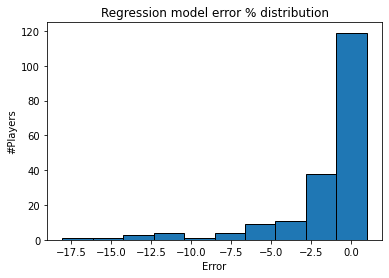

In [1205]:
plt.hist(Y_test['Error'], edgecolor = "black")
plt.title(label="Regression model error % distribution")
plt.xlabel(xlabel="Error")
plt.ylabel(ylabel="#Players")

Presenting the indepent variables coefficient pairing for the model equation.

In [1206]:
df_coef = pd.DataFrame(x.columns.transpose())
df_coef['coef'] = df9['coef_']
df_coef.columns=["Variable","Coefficient"]
df_coef = df_coef.set_index(["Variable"])
df_coef

,Coefficient
Variable,
Goal Creating Actions (20/21),78140.071843
Total Carries in Forward Direction (20/21),57833.995301
Number of Times Player was Pass Target (20/21),7024.467934
Passes Leading to Goals (20/21),843796.646440
Non-penalty xG+ xA (20/21),693241.130481
Passes Leading to Shot Attempt (20/21),-235173.281029
Touches in Attacking Penalty Box (20/21),53026.150575


#### Trying the Random Forest model using those same variables we used in the regression model.

I tried using higher n_estimators as it increases the score but you should consider this uses CPU resources and at some point this doesn´t inrease the score that much.

In [1207]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [1208]:
RFReg = RandomForestRegressor(n_estimators=1000,random_state=0)

RFReg.fit(X_train,Y_train)

C:\Users\camil\AppData\Local\Temp\ipykernel_14616\945952714.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFReg.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=1000, random_state=0)

Increased the score from .36... to approximately .38 using the Random Forest model

In [1209]:
RFReg.score(X_test,Y_test)

0.3795896832411003

In [1210]:
RFReg.predict(X_test)
Y_test['Prediction']= RFReg.predict(X_test)
Y_test
Y_test['Error'] = (Y_test['Value']- Y_test['Prediction'])/Y_test['Value']
pd.set_option('display.max_rows', 100)
Y_test.sort_values(by=['Error'], ascending = False)

,Value,Prediction,Error
17,72000000,9586447.5,0.866855
265,24300000,3338280.0,0.862622
451,16200000,3111615.0,0.807925
257,25200000,5178690.0,0.794496
80,45000000,10179360.0,0.773792
...,...,...,...
1916,720000,11197620.0,-14.552250
1725,1350000,21257595.0,-14.746367
1873,900000,16911270.0,-17.790300
2062,225000,7725195.0,-33.334200


Text(0, 0.5, '#Players')

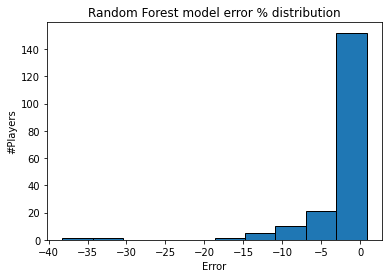

In [1211]:
plt.hist(Y_test['Error'], edgecolor = "black")
plt.title(label="Random Forest model error % distribution")
plt.xlabel(xlabel="Error")
plt.ylabel(ylabel="#Players")

### Standardizing my dataframe (only top 8 correlated variables)

Now I´ll try standardizing my dataframe, trying to get the effect from the distinct scalability of the columns in the dataframe to not affect the regression

In [1212]:
# define standard scaler
scaler = StandardScaler()
  
# transform data
Std_data = scaler.fit_transform(df_reg)

Std_data

array([[ 8.8341642 ,  5.21490352,  3.08887236, ...,  4.93256414,
         2.22815282,  5.45902963],
       [ 7.03143181,  2.61414655,  0.11944509, ...,  5.21362192,
         0.77903409,  3.47211264],
       [ 6.43052102,  4.56471428,  1.27784803, ...,  4.95598562,
         2.27645678,  2.9239976 ],
       ...,
       [-0.76538574, -0.8535294 , -1.13685106, ..., -0.85254195,
        -1.10482026, -0.86713137],
       [-0.7683903 , -0.8535294 , -1.16948213, ..., -0.85254195,
        -1.0565163 , -0.86713137],
       [-0.7743994 , -0.8535294 , -1.16948213, ..., -0.85254195,
        -1.10482026, -0.86713137]])

Creating a dataframe with the standardized data and setting the respective column names

In [1213]:
Std_df = pd.DataFrame(Std_data)
Std_df.columns = ['Value','Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']
Std_df

,Value,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,8.834164,5.214904,3.088872,1.585359,3.229115,4.932564,2.228153,5.459030
1,7.031432,2.614147,0.119445,0.574464,2.292358,5.213622,0.779034,3.472113
2,6.430521,4.564714,1.277848,1.869428,3.853619,4.955986,2.276457,2.923998
3,5.228699,3.914525,2.729931,1.736209,4.478124,2.285937,3.097624,2.193178
4,5.228699,2.180687,2.387304,2.606049,2.292358,4.440713,3.097624,6.281202
...,...,...,...,...,...,...,...,...
1905,-0.765386,-0.853529,-1.169482,-1.508058,-0.830166,-0.852542,-1.104820,-0.867131
1906,-0.765386,-0.853529,-0.924749,-1.341534,-0.830166,-0.501220,-0.959908,-0.456045
1907,-0.765386,-0.853529,-1.136851,-1.474753,-0.830166,-0.852542,-1.104820,-0.867131
1908,-0.768390,-0.853529,-1.169482,-1.431653,-0.830166,-0.852542,-1.056516,-0.867131


In [1214]:
y_std=Std_df[['Value']]
x_std=Std_df[['Goal Creating Actions (20/21)','Total Carries in Forward Direction (20/21)','Number of Times Player was Pass Target (20/21)','Passes Leading to Goals (20/21)','Non-penalty xG+ xA (20/21)','Passes Leading to Shot Attempt (20/21)','Touches in Attacking Penalty Box (20/21)']]
x_std

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
0,5.214904,3.088872,1.585359,3.229115,4.932564,2.228153,5.459030
1,2.614147,0.119445,0.574464,2.292358,5.213622,0.779034,3.472113
2,4.564714,1.277848,1.869428,3.853619,4.955986,2.276457,2.923998
3,3.914525,2.729931,1.736209,4.478124,2.285937,3.097624,2.193178
4,2.180687,2.387304,2.606049,2.292358,4.440713,3.097624,6.281202
...,...,...,...,...,...,...,...
1905,-0.853529,-1.169482,-1.508058,-0.830166,-0.852542,-1.104820,-0.867131
1906,-0.853529,-0.924749,-1.341534,-0.830166,-0.501220,-0.959908,-0.456045
1907,-0.853529,-1.136851,-1.474753,-0.830166,-0.852542,-1.104820,-0.867131
1908,-0.853529,-1.169482,-1.431653,-0.830166,-0.852542,-1.056516,-0.867131


Training the regression model (again using the 90% of the dataframe to traing and the rest to testing)

In [1215]:
X_train_std, X_test_std, Y_train_std, Y_test_std = train_test_split(x_std,y_std,test_size=0.1, random_state=0)
X_train_std

,Goal Creating Actions (20/21),Total Carries in Forward Direction (20/21),Number of Times Player was Pass Target (20/21),Passes Leading to Goals (20/21),Non-penalty xG+ xA (20/21),Passes Leading to Shot Attempt (20/21),Touches in Attacking Penalty Box (20/21)
621,-0.636800,1.473634,0.511773,-0.830166,-0.243583,-0.235349,-0.022121
459,0.013390,0.739435,-0.007388,-0.205662,-0.384112,0.102779,-0.090635
14,1.747228,2.468882,2.218148,1.355600,4.042548,3.145928,5.596058
279,-0.420070,-1.169482,-0.391371,-0.205662,-0.829120,-1.008212,-0.867131
303,2.830876,2.419935,1.765596,1.980105,1.606714,2.662888,1.964796
...,...,...,...,...,...,...,...
835,0.880309,-0.582123,-0.285580,-0.830166,1.021177,-0.428565,0.891404
1216,-0.420070,-0.843171,-1.325861,-0.205662,-0.524641,-0.718389,-0.638750
1653,-0.853529,-1.169482,-1.063342,-0.830166,-0.829120,-1.056516,-0.867131
559,0.013390,1.261532,1.945833,0.418843,-0.290426,1.165466,0.069232


In [1216]:
regressor_std = LinearRegression()
regressor_std.fit(X_train_std, Y_train_std)

LinearRegression()

The regression using the standardized dataframe didn´t have the effect we were looking for, as it gave us the same .36 we had with the initial dataframes.

In [1217]:
regressor_std.score(X_test_std,Y_test_std)

0.36286202662284783

In [1218]:
regressor_std.coef_

array([[ 0.02407259,  0.23667337,  0.23940029,  0.18042617,  0.19762298,
        -0.32506691,  0.15502335]])

In [1219]:
regressor_std.predict(X_test_std)
Y_test_std['Prediction']= regressor_std.predict(X_test_std)
Y_test_std
Y_test_std['Error'] = (Y_test_std['Value']- Y_test_std['Prediction'])/Y_test_std['Value']
pd.set_option('display.max_rows', 100)
Y_test_std.sort_values(by=['Error'], ascending = False)

,Value,Prediction,Error
620,-0.059316,0.924211,16.581264
522,-0.179498,1.125484,7.270186
794,-0.239589,1.396914,6.830464
536,0.120958,-0.478530,4.956173
758,-0.179498,0.563705,4.140459
...,...,...,...
521,0.120958,1.125484,-8.304775
565,0.120958,1.276207,-9.550857
575,0.060867,0.894107,-13.689616
602,0.000776,0.243450,-312.917419


(-1.0, 1.0)

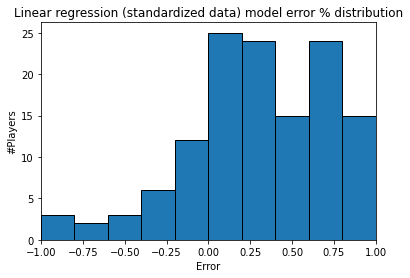

In [1220]:
plt.hist(Y_test_std['Error'], bins = [-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1], edgecolor = "black")
plt.title(label="Linear regression (standardized data) model error % distribution")
plt.xlabel(xlabel="Error")
plt.ylabel(ylabel="#Players")
plt.xlim([-1,1])

### Using all of 2021-2020 cuantitative statistics

Now I´ll try using every cuantitative 2020-2021 season independent variable, it doesn´t matter if correlation is positive, negative or no correlation is detected between 'Value' (y) and those variables.

Here I also filtered the rows with 'fail' in any of their values and the rows with Nan values. 

In [1221]:
variables_list = value_corr.index.tolist()
variables_list 
df_all_2021_2020 = df_2021_2020[df_2021_2020.columns.intersection(variables_list)]
df_all_2021_2020 = df_all_2021_2020.replace('fail', np.nan)
df_all_2021_2020 = df_all_2021_2020.dropna()
df_all_2021_2020
##df_2021_2020

,Value,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,144000000,1.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,117000000,3.0,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,108000000,3.0,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,90000000,5.0,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,90000000,2.0,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,360000,2.0,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2049,270000,1.0,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,270000,1.0,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0
2060,270000,1.0,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,...,26.0,5.0,29.0,25.0,0.0,0.0,0.0,131.0,25.0,25.0


Setting X and Y variables

In [1222]:
y_std =df_all_2021_2020.iloc[:,0]
y_std = y_std.to_frame()
x_std =df_all_2021_2020.iloc[:,1:]
x_std

,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,1.0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,5.0,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,3.0,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,2.0,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,3.0,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,1.0,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,5.0,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.0,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,2.0,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.0,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2.0,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,5.0,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2049,1.0,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,4.0,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,1.0,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,2.0,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0
2060,1.0,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,0.0,...,26.0,5.0,29.0,25.0,0.0,0.0,0.0,131.0,25.0,25.0


In [1223]:
X_train_qua, X_test_qua, Y_train_qua, Y_test_qua = train_test_split(x_std,y_std,test_size=0.1, random_state=0)
X_train_qua

,Contract Years Left,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Yellow Cards (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
774,4.0,21.0,1936.0,21.500000,2.0,4.0,2.0,0.0,0.0,3.0,...,27.0,5.0,25.0,17.0,0.0,0.0,0.0,191.0,27.0,45.0
439,5.0,18.0,1440.0,16.000000,2.0,4.0,2.0,0.0,0.0,0.0,...,20.0,4.0,19.0,14.0,0.0,0.0,0.0,106.0,8.0,9.0
27,4.0,24.0,2065.0,22.900000,2.0,6.0,2.0,0.0,0.0,5.0,...,18.0,3.0,27.0,21.0,0.0,0.0,0.0,137.0,10.0,29.0
479,4.0,30.0,2645.0,29.400000,0.0,2.0,0.0,0.0,0.0,4.0,...,42.0,7.0,22.0,40.0,1.0,1.0,0.0,275.0,20.0,39.0
1712,1.0,23.0,2082.0,23.100000,1.0,1.0,1.0,0.0,0.0,1.0,...,17.0,2.0,39.0,32.0,0.0,0.0,0.0,180.0,39.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,4.0,35.0,3140.0,34.900000,3.0,7.0,3.0,0.0,0.0,4.0,...,54.0,3.0,110.0,34.0,0.0,1.0,0.0,291.0,24.0,46.0
968,3.0,9.0,950.0,10.600000,5.0,0.0,5.0,0.0,0.0,2.0,...,20.0,4.0,8.0,6.0,1.0,0.0,0.0,50.0,8.0,24.0
1501,2.0,19.0,1480.0,16.400000,1.0,2.0,1.0,0.0,0.0,1.0,...,14.0,1.0,38.0,23.0,0.0,0.0,0.0,130.0,22.0,23.0
627,3.0,11.0,1004.0,11.155556,3.0,0.0,3.0,0.0,0.0,1.0,...,13.0,2.0,10.0,8.0,0.0,0.0,0.0,83.0,7.0,13.0


In [1224]:
regressor_qua = LinearRegression()
regressor_qua.fit(X_train_qua, Y_train_qua)

LinearRegression()

**We went from having previous predictive scores between .36-.38 to a .59 score** this means our model can predict correctly 59% of the tests we do, that´s a huge improvement using all the cuantitative variables from the 2021/2020 season.

In [1225]:
regressor_qua.score(X_test_qua,Y_test_qua)

0.5914595118627878

In [1226]:
regressor_qua.coef_

array([[ 2.55661982e+06, -1.29155561e+05,  3.60468723e+05,
        -3.28828372e+07,  1.81392498e+06,  1.34145949e+06,
         2.22754708e+06, -4.13622057e+05, -6.76522546e+05,
        -2.75404722e+05, -8.35775530e+05,  6.38464115e+07,
        -6.67375509e+07, -9.21152915e+07, -1.28546325e+08,
         1.58309749e+08,  7.82725003e+05,  7.14201186e+06,
         3.78925228e+06, -9.48296251e+06,  1.11310424e+08,
         4.47038372e+07, -1.05724933e+08, -8.58332183e+07,
         7.66233875e+07, -2.23856766e+05,  9.24883659e+04,
         1.31452869e+03,  6.76306881e+05,  1.40293119e+06,
         1.10597077e+07, -3.49482758e+06, -4.76357594e+05,
        -2.10139094e+07,  1.03120002e+06, -4.91446477e+06,
        -1.11589982e+05, -3.44011545e+05, -8.38616909e+04,
         1.60222279e+05, -2.77394575e+05, -1.52922051e+05,
         3.47723570e+04,  2.07593699e+05,  3.50933488e+05,
        -9.63272732e+06,  8.50701940e+05, -7.02004721e+05,
         8.64844790e+05,  8.61491454e+05, -3.25346853e+0

In [1227]:
regressor_qua.predict(X_test_qua)
Y_test_qua['Prediction']= regressor_qua.predict(X_test_qua)
Y_test_qua['Error'] = (Y_test_qua['Value']- Y_test_qua['Prediction'])/Y_test_qua['Value']
pd.set_option('display.max_rows', 100)
Y_test_qua.sort_values(by=['Error'], ascending = False)

,Value,Prediction,Error
1810,1080000,-6.761338e+06,7.260498
1845,900000,-2.556482e+06,3.840536
1329,3150000,-5.667659e+06,2.799257
1496,2250000,-3.397709e+06,2.510093
1252,3600000,-2.620739e+06,1.727983
...,...,...,...
1934,720000,7.400812e+06,-9.278905
1858,900000,1.009383e+07,-10.215372
1885,900000,1.207139e+07,-12.412652
1863,900000,1.231956e+07,-12.688403


Text(0, 0.5, '#Players')

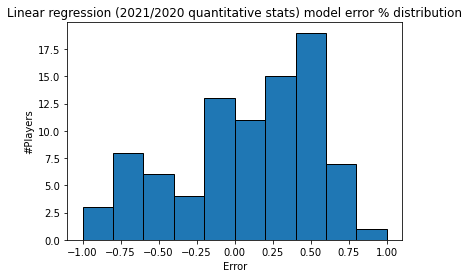

In [1228]:
plt.hist(Y_test_qua['Error'], bins = [-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1], edgecolor = "black")
plt.title(label="Linear regression (2021/2020 quantitative stats) model error % distribution")
plt.xlabel(xlabel="Error")
plt.ylabel(ylabel="#Players")
#plt.xlim([-1,1])

### Variables significance (p-value)

Now I´ll generate a last regression model, this will be based on getting the variables with demonstrated significance in the model (this means that they actually affect 'Value'), all of this calculations will be generated using scipy and the pearson correlation p-value

In [1229]:
df_2021_2020_numpy = df_all_2021_2020.to_numpy()
df_2021_2020_numpy


array([[1.44e+08, 1.00e+00, 2.70e+01, ..., 1.09e+02, 7.00e+00, 8.00e+00],
       [1.17e+08, 3.00e+00, 2.70e+01, ..., 9.60e+01, 3.70e+01, 4.00e+01],
       [1.08e+08, 3.00e+00, 3.50e+01, ..., 1.55e+02, 9.00e+01, 1.29e+02],
       ...,
       [2.70e+05, 1.00e+00, 2.70e+01, ..., 2.05e+02, 1.40e+01, 2.80e+01],
       [2.70e+05, 1.00e+00, 1.90e+01, ..., 1.31e+02, 2.50e+01, 2.50e+01],
       [2.25e+05, 1.00e+00, 3.00e+00, ..., 1.60e+01, 1.00e+00, 5.00e+00]])

#### First correlation p-value example (between 'Value' and Contract Years Left)

We got a p-value nearly to 0, meaning Contract Years Left is a significant variable for the model

In [1230]:
pearson_corr = st.pearsonr(df_all_2021_2020['Value'],df_all_2021_2020['Contract Years Left'])
pearson_corr

(0.31109957800189214, 9.415147932899331e-35)

Getting significant independent variables (where p-value is <.05) to include them in our regression model

In [1231]:
corr_df = pd.DataFrame(columns=['r','p'])

for col in df_all_2021_2020:
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = st.pearsonr(df_all_2021_2020['Value'],df_all_2021_2020[col])
        corr_df.loc[col] = [round(r,3),round(p,3)]

pd.set_option('display.max_rows', 500)
corr_df

,r,p
Value,1.000,0.000
Starts (20/21),0.313,0.000
Min (20/21),0.319,0.000
Total Mins/90 (20/21),0.319,0.000
Gls (20/21),0.424,0.000
Ast (20/21),0.429,0.000
Non-Penalty Goals (20/21),0.417,0.000
Penalties Scored (20/21),0.263,0.000
Penalties Attempted (20/21),0.258,0.000
Yellow Cards (20/21),0.039,0.137


Selecting only variables with p-value <.05

In [1232]:
pd.set_option('display.max_rows', 50)
corr_df = corr_df.loc[corr_df['p'] <.05]
corr_df

,r,p
Value,1.000,0.000
Starts (20/21),0.313,0.000
Min (20/21),0.319,0.000
Total Mins/90 (20/21),0.319,0.000
Gls (20/21),0.424,0.000
...,...,...
Interceptions (20/21),0.096,0.000
Penalty Kicks Won (20/21),0.231,0.000
Total Loose Balls Recovered (20/21),0.193,0.000
Aerial Duel Won (20/21),0.054,0.037


Generating a list of the columns we need in the dataframe

In [1233]:
index_list = print(corr_df.index.tolist())
index_list

['Value', 'Starts (20/21)', 'Min (20/21)', 'Total Mins/90 (20/21)', 'Gls (20/21)', 'Ast (20/21)', 'Non-Penalty Goals (20/21)', 'Penalties Scored (20/21)', 'Penalties Attempted (20/21)', 'Gls/90 (20/21)', 'Ast/90 (20/21)', '(G+A)/90 (20/21)', 'Non-Penalty Goals/90 (20/21)', '(Gls+Ast-Scored Penalties)/90 (20/21)', 'xG (20/21)', 'Non-Penalty xG (20/21)', 'xA (20/21)', 'Non-penalty xG+ xA (20/21)', 'xG/90 (20/21)', 'xA/90 (20/21)', '(xG+xA)/90 (20/21)', 'Non-Penalty xG/90 (20/21)', '(Non-Penalty xG+xA)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Shots/90 (20/21)', 'Shots on Target/90 (20/21)', 'Goals/Shots (20/21)', 'Goals/Shots on Target (20/21)', 'Freekick Shots (20/21)', 'Non-Penalty xG/Shots (20/21)', 'Goals Scored minus xG (20/21)', 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)', 'Shot-Creating Actions (20/21)', 'Shot-Creating Actions/90 (20/21)', 'Passes Leading to Shot Attempt (20/21)', 'Set-Piece Leading to Shot Attempt (20/21)', 'Dribbles Leadin

Creating the dataframe with the significant variables

In [1234]:
df_significant = df_all_2021_2020[['Value', 'Starts (20/21)', 'Min (20/21)', 'Total Mins/90 (20/21)', 'Gls (20/21)', 'Ast (20/21)', 'Non-Penalty Goals (20/21)', 'Penalties Scored (20/21)', 'Penalties Attempted (20/21)', 'Gls/90 (20/21)', 'Ast/90 (20/21)', '(G+A)/90 (20/21)', 'Non-Penalty Goals/90 (20/21)', '(Gls+Ast-Scored Penalties)/90 (20/21)', 'xG (20/21)', 'Non-Penalty xG (20/21)', 'xA (20/21)', 'Non-penalty xG+ xA (20/21)', 'xG/90 (20/21)', 'xA/90 (20/21)', '(xG+xA)/90 (20/21)', 'Non-Penalty xG/90 (20/21)', '(Non-Penalty xG+xA)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Shots/90 (20/21)', 'Shots on Target/90 (20/21)', 'Goals/Shots (20/21)', 'Goals/Shots on Target (20/21)', 'Freekick Shots (20/21)', 'Non-Penalty xG/Shots (20/21)', 'Goals Scored minus xG (20/21)', 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)', 'Shot-Creating Actions (20/21)', 'Shot-Creating Actions/90 (20/21)', 'Passes Leading to Shot Attempt (20/21)', 'Set-Piece Leading to Shot Attempt (20/21)', 'Dribbles Leading to Shot Attempt (20/21)', 'Shots Leading to Shot Attempt (20/21)', 'Fouls Drawn Leading to Shot Attempt (20/21)', 'Defensive Actions Leading to Shot Attempt (20/21)', 'Goal Creating Actions (20/21)', 'Goal Creating Actions/90 (20/21)', 'Passes Leading to Goals (20/21)', 'Set-Piece Leading to Goals (20/21)', 'Dribbles Leading to Goals (20/21)', 'Shots Leading to Goals (20/21)', 'Fouls Drawn Leading to Goals (20/21)', 'Defensive Actions Leading to Goals (20/21)', 'Touches (20/21)', 'Touches in Defensive Penalty Box (20/21)', 'Touches in Defensive 3rd (20/21)', 'Touches in Midfield 3rd (20/21)', 'Touches in Attacking 3rd (20/21)', 'Touches in Attacking Penalty Box (20/21)', 'Touches in Open-play (20/21)', 'Total Successful Dribbles (20/21)', 'Total Attempted Dribbles (20/21)', 'Total no. of Players Dribbles Past (20/21)', 'Total Nutmegs (20/21)', 'Total Carries (20/21)', 'Total Distance Carried the Ball (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Total Carries in Forward Direction (20/21)', 'Carries into Final Third (20/21)', 'Carries into Attacking Penalty Box (20/21)', 'Total Failed Attempts at Controlling Ball (20/21)', 'Number of Times Tackled when Dribbling (20/21)', 'Number of Times Player was Pass Target (20/21)', 'Number of Times Received Pass (20/21)', 'Progressive Passes Received (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Passes Attempted (All pass-types) (20/21)', 'Pass Completion % (All pass-types) (20/21)', 'Total Distance of Completed Passes (All Pass-types) (20/21)', 'Total Distance of Completed Progressive Passes (All Pass-types) (20/21)', 'Passes Completed (Short Passes) (20/21)', 'Passes Attempted (Short Passes) (20/21)', 'Pass Completion % (Short Passes) (20/21)', 'Passes Completed (Medium Passes) (20/21)', 'Passes Attempted (Medium Passes) (20/21)', 'Pass Completion % (Medium Passes) (20/21)', 'Passes Completed (Long Passes) (20/21)', 'Passes Attempted (Long Passes) (20/21)', 'Pass Completion % (Long Passes) (20/21)', 'Total Assists (20/21)', 'xG Assisted (20/21)', 'Assist minus xG Assisted (20/21)', 'Completed passes that enter Final 3rd (20/21)', 'Completed passes that enter Penalty Box (20/21)', 'Completed Crosses that enter Penalty Box (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Number of Players Tackled (20/21)', 'Total Tackles Won (20/21)', 'Tackles in Midfield 3rd (20/21)', 'Tackles in Attacking 3rd (20/21)', 'Number of Dribblers Tackled (20/21)', 'Times Dribbled Past + Total Tackles (20/21)', 'Number of Times Dribbled Past (20/21)', 'Number of Pressing Actions (20/21)', 'Times Squad gained Possession within 5 seconds of Pressing Actions (20/21)', 'Successful Pressure % (20/21)', 'Number of Presses in Midfield Third (20/21)', 'Number of Presses in Attacking Third (20/21)', 'Total Defensive Blocks (20/21)', 'Times blocked a Pass (20/21)', 'Total Interceptions (20/21)', 'Total Players Tackled + Total Interceptions (20/21)', 'Fouls Committed (20/21)', 'Fouls Drawn (20/21)', 'Offsides (20/21)', 'Crosses (20/21)', 'Interceptions (20/21)', 'Penalty Kicks Won (20/21)', 'Total Loose Balls Recovered (20/21)', 'Aerial Duel Won (20/21)', 'Aerial Duel Lost (20/21)']]
df_significant

,Value,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Gls/90 (20/21),...,Total Players Tackled + Total Interceptions (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,144000000,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,1.02,...,16.0,23.0,38.0,17.0,68.0,7.0,4.0,109.0,7.0,8.0
1,117000000,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,1.01,...,12.0,21.0,22.0,15.0,13.0,5.0,0.0,96.0,37.0,40.0
2,108000000,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,0.67,...,33.0,26.0,60.0,12.0,37.0,15.0,2.0,155.0,90.0,129.0
3,90000000,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.35,...,30.0,1.0,22.0,9.0,52.0,14.0,0.0,154.0,5.0,22.0
4,90000000,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.64,...,35.0,22.0,22.0,13.0,47.0,9.0,2.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,360000,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,0.08,...,63.0,18.0,9.0,0.0,17.0,21.0,0.0,119.0,24.0,11.0
2049,270000,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,0.00,...,22.0,14.0,24.0,0.0,32.0,8.0,0.0,72.0,3.0,17.0
2058,270000,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,0.04,...,45.0,19.0,21.0,3.0,26.0,20.0,0.0,205.0,14.0,28.0
2060,270000,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,0.11,...,71.0,18.0,26.0,5.0,29.0,25.0,0.0,131.0,25.0,25.0


In [1235]:
y_sig=df_significant[['Value']]
x_sig=df_significant[['Starts (20/21)', 'Min (20/21)', 'Total Mins/90 (20/21)', 'Gls (20/21)', 'Ast (20/21)', 'Non-Penalty Goals (20/21)', 'Penalties Scored (20/21)', 'Penalties Attempted (20/21)', 'Gls/90 (20/21)', 'Ast/90 (20/21)', '(G+A)/90 (20/21)', 'Non-Penalty Goals/90 (20/21)', '(Gls+Ast-Scored Penalties)/90 (20/21)', 'xG (20/21)', 'Non-Penalty xG (20/21)', 'xA (20/21)', 'Non-penalty xG+ xA (20/21)', 'xG/90 (20/21)', 'xA/90 (20/21)', '(xG+xA)/90 (20/21)', 'Non-Penalty xG/90 (20/21)', '(Non-Penalty xG+xA)/90 (20/21)', 'Total Shots (20/21)', 'Total Shots on Target (20/21)', 'Shots/90 (20/21)', 'Shots on Target/90 (20/21)', 'Goals/Shots (20/21)', 'Goals/Shots on Target (20/21)', 'Freekick Shots (20/21)', 'Non-Penalty xG/Shots (20/21)', 'Goals Scored minus xG (20/21)', 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)', 'Shot-Creating Actions (20/21)', 'Shot-Creating Actions/90 (20/21)', 'Passes Leading to Shot Attempt (20/21)', 'Set-Piece Leading to Shot Attempt (20/21)', 'Dribbles Leading to Shot Attempt (20/21)', 'Shots Leading to Shot Attempt (20/21)', 'Fouls Drawn Leading to Shot Attempt (20/21)', 'Defensive Actions Leading to Shot Attempt (20/21)', 'Goal Creating Actions (20/21)', 'Goal Creating Actions/90 (20/21)', 'Passes Leading to Goals (20/21)', 'Set-Piece Leading to Goals (20/21)', 'Dribbles Leading to Goals (20/21)', 'Shots Leading to Goals (20/21)', 'Fouls Drawn Leading to Goals (20/21)', 'Defensive Actions Leading to Goals (20/21)', 'Touches (20/21)', 'Touches in Defensive Penalty Box (20/21)', 'Touches in Defensive 3rd (20/21)', 'Touches in Midfield 3rd (20/21)', 'Touches in Attacking 3rd (20/21)', 'Touches in Attacking Penalty Box (20/21)', 'Touches in Open-play (20/21)', 'Total Successful Dribbles (20/21)', 'Total Attempted Dribbles (20/21)', 'Total no. of Players Dribbles Past (20/21)', 'Total Nutmegs (20/21)', 'Total Carries (20/21)', 'Total Distance Carried the Ball (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Total Carries in Forward Direction (20/21)', 'Carries into Final Third (20/21)', 'Carries into Attacking Penalty Box (20/21)', 'Total Failed Attempts at Controlling Ball (20/21)', 'Number of Times Tackled when Dribbling (20/21)', 'Number of Times Player was Pass Target (20/21)', 'Number of Times Received Pass (20/21)', 'Progressive Passes Received (20/21)', 'Passes Completed (All pass-types) (20/21)', 'Passes Attempted (All pass-types) (20/21)', 'Pass Completion % (All pass-types) (20/21)', 'Total Distance of Completed Passes (All Pass-types) (20/21)', 'Total Distance of Completed Progressive Passes (All Pass-types) (20/21)', 'Passes Completed (Short Passes) (20/21)', 'Passes Attempted (Short Passes) (20/21)', 'Pass Completion % (Short Passes) (20/21)', 'Passes Completed (Medium Passes) (20/21)', 'Passes Attempted (Medium Passes) (20/21)', 'Pass Completion % (Medium Passes) (20/21)', 'Passes Completed (Long Passes) (20/21)', 'Passes Attempted (Long Passes) (20/21)', 'Pass Completion % (Long Passes) (20/21)', 'Total Assists (20/21)', 'xG Assisted (20/21)', 'Assist minus xG Assisted (20/21)', 'Completed passes that enter Final 3rd (20/21)', 'Completed passes that enter Penalty Box (20/21)', 'Completed Crosses that enter Penalty Box (20/21)', 'Total Completed Progressive Passes (20/21)', 'Total Number of Players Tackled (20/21)', 'Total Tackles Won (20/21)', 'Tackles in Midfield 3rd (20/21)', 'Tackles in Attacking 3rd (20/21)', 'Number of Dribblers Tackled (20/21)', 'Times Dribbled Past + Total Tackles (20/21)', 'Number of Times Dribbled Past (20/21)', 'Number of Pressing Actions (20/21)', 'Times Squad gained Possession within 5 seconds of Pressing Actions (20/21)', 'Successful Pressure % (20/21)', 'Number of Presses in Midfield Third (20/21)', 'Number of Presses in Attacking Third (20/21)', 'Total Defensive Blocks (20/21)', 'Times blocked a Pass (20/21)', 'Total Interceptions (20/21)', 'Total Players Tackled + Total Interceptions (20/21)', 'Fouls Committed (20/21)', 'Fouls Drawn (20/21)', 'Offsides (20/21)', 'Crosses (20/21)', 'Interceptions (20/21)', 'Penalty Kicks Won (20/21)', 'Total Loose Balls Recovered (20/21)', 'Aerial Duel Won (20/21)', 'Aerial Duel Lost (20/21)']]
x_sig

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Gls/90 (20/21),Ast/90 (20/21),...,Total Players Tackled + Total Interceptions (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,27.0,2380.0,26.4,27.0,7.0,21.0,6.0,6.0,1.02,0.26,...,16.0,23.0,38.0,17.0,68.0,7.0,4.0,109.0,7.0,8.0
1,27.0,2407.0,26.7,27.0,6.0,25.0,2.0,4.0,1.01,0.22,...,12.0,21.0,22.0,15.0,13.0,5.0,0.0,96.0,37.0,40.0
2,35.0,3082.0,34.2,23.0,14.0,19.0,4.0,4.0,0.67,0.41,...,33.0,26.0,60.0,12.0,37.0,15.0,2.0,155.0,90.0,129.0
3,24.0,2062.0,22.9,8.0,11.0,7.0,1.0,1.0,0.35,0.48,...,30.0,1.0,22.0,9.0,52.0,14.0,0.0,154.0,5.0,22.0
4,34.0,3078.0,34.2,22.0,5.0,16.0,6.0,6.0,0.64,0.15,...,35.0,22.0,22.0,13.0,47.0,9.0,2.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,12.0,1191.0,13.2,1.0,0.0,1.0,0.0,0.0,0.08,0.00,...,63.0,18.0,9.0,0.0,17.0,21.0,0.0,119.0,24.0,11.0
2049,10.0,1130.0,12.6,0.0,2.0,0.0,0.0,0.0,0.00,0.16,...,22.0,14.0,24.0,0.0,32.0,8.0,0.0,72.0,3.0,17.0
2058,27.0,2183.0,24.3,1.0,4.0,1.0,0.0,0.0,0.04,0.16,...,45.0,19.0,21.0,3.0,26.0,20.0,0.0,205.0,14.0,28.0
2060,19.0,1625.0,18.1,2.0,0.0,2.0,0.0,0.0,0.11,0.00,...,71.0,18.0,26.0,5.0,29.0,25.0,0.0,131.0,25.0,25.0


In [1236]:
X_train_sig, X_test_sig, Y_train_sig, Y_test_sig = train_test_split(x_sig,y_sig,test_size=0.1, random_state=0)
X_train_sig

,Starts (20/21),Min (20/21),Total Mins/90 (20/21),Gls (20/21),Ast (20/21),Non-Penalty Goals (20/21),Penalties Scored (20/21),Penalties Attempted (20/21),Gls/90 (20/21),Ast/90 (20/21),...,Total Players Tackled + Total Interceptions (20/21),Fouls Committed (20/21),Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
774,21.0,1936.0,21.500000,2.0,4.0,2.0,0.0,0.0,0.090000,0.190000,...,76.0,36.0,27.0,5.0,25.0,17.0,0.0,191.0,27.0,45.0
439,18.0,1440.0,16.000000,2.0,4.0,2.0,0.0,0.0,0.120000,0.250000,...,28.0,5.0,20.0,4.0,19.0,14.0,0.0,106.0,8.0,9.0
27,24.0,2065.0,22.900000,2.0,6.0,2.0,0.0,0.0,0.090000,0.260000,...,53.0,17.0,18.0,3.0,27.0,21.0,0.0,137.0,10.0,29.0
479,30.0,2645.0,29.400000,0.0,2.0,0.0,0.0,0.0,0.000000,0.070000,...,123.0,33.0,42.0,7.0,22.0,40.0,1.0,275.0,20.0,39.0
1712,23.0,2082.0,23.100000,1.0,1.0,1.0,0.0,0.0,0.040000,0.040000,...,63.0,26.0,17.0,2.0,39.0,32.0,0.0,180.0,39.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,35.0,3140.0,34.900000,3.0,7.0,3.0,0.0,0.0,0.090000,0.200000,...,108.0,46.0,54.0,3.0,110.0,34.0,0.0,291.0,24.0,46.0
968,9.0,950.0,10.600000,5.0,0.0,5.0,0.0,0.0,0.470000,0.000000,...,26.0,14.0,20.0,4.0,8.0,6.0,1.0,50.0,8.0,24.0
1501,19.0,1480.0,16.400000,1.0,2.0,1.0,0.0,0.0,0.060000,0.120000,...,44.0,9.0,14.0,1.0,38.0,23.0,0.0,130.0,22.0,23.0
627,11.0,1004.0,11.155556,3.0,0.0,3.0,0.0,0.0,0.033333,0.000000,...,17.0,11.0,13.0,2.0,10.0,8.0,0.0,83.0,7.0,13.0


In [1237]:
regressor_std = LinearRegression()
regressor_std.fit(X_train_sig, Y_train_sig)

LinearRegression()

Using only the significant variables in our model we also got a much higher score from our initial 2 models (correlation based), **increased from .36-38 to .56**, this means our model can predict %56 correctly

In [1238]:
regressor_std.score(X_test_sig,Y_test_sig)

0.564883175777399

In [1239]:
regressor_std.coef_

array([[-3.69353635e+05,  2.94060262e+05, -2.67489887e+07,
         1.81596525e+06,  1.54719558e+06,  2.71552171e+06,
        -8.99556464e+05, -1.30259589e+04,  1.09401850e+07,
        -2.81523102e+07, -3.89410625e+07, -3.84710121e+07,
         6.55403261e+07,  2.50999825e+05,  8.62870711e+06,
         4.33364018e+06, -1.09437655e+07,  1.84201843e+08,
         3.22885824e+07, -1.80763515e+08, -1.68737606e+08,
         1.62861464e+08, -1.24067803e+05,  1.34017071e+05,
         7.41200801e+05,  1.65925351e+06,  1.14412930e+07,
        -2.72911918e+06, -5.67245824e+05, -2.17573685e+07,
         1.56496542e+06, -5.91318540e+06, -1.07323060e+05,
        -8.50380311e+05, -5.25059088e+04,  1.54779706e+05,
        -2.78169357e+05, -1.59103737e+05,  6.46634797e+04,
         1.63012757e+05,  2.55075405e+05, -6.36058657e+06,
         8.35195989e+05, -7.80185520e+05,  6.87205646e+05,
         8.71675210e+05, -2.17280417e+05, -1.14153550e+06,
         1.23795354e+04,  5.05112828e+04, -1.98661166e+0

Comparing the predictions vs the real values in our test dataframe, where we can see how we got both outliers with -5600% error and +300% error, but we also have some predictions that are close to the real value (tending to 0% error)

In [1240]:
regressor_std.predict(X_test_sig)
Y_test_sig['Prediction']= regressor_std.predict(X_test_sig)
Y_test_sig['Error'] = (Y_test_sig['Value']- Y_test_sig['Prediction'])/Y_test_sig['Value']
pd.set_option('display.max_rows', 500)
Y_test_sig.sort_values(by=['Error'])

,Value,Prediction,Error
2062,225000,1.288141e+07,-56.250691
1863,900000,1.608936e+07,-16.877066
2022,360000,4.655986e+06,-11.933296
1893,810000,9.908086e+06,-11.232205
1934,720000,8.459828e+06,-10.749761
1946,720000,6.920331e+06,-8.611571
1858,900000,8.383336e+06,-8.314817
1885,900000,6.294772e+06,-5.994191
2026,360000,2.481213e+06,-5.892259
1374,3150000,1.998072e+07,-5.343085


Text(0, 0.5, '#Players')

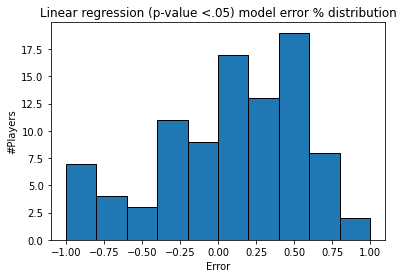

In [1241]:
plt.hist(Y_test_sig['Error'], bins = [-1,-.8,-.6,-.4,-.2,0,.2,.4,.6,.8,1], edgecolor = "black")
plt.title(label="Linear regression (p-value <.05) model error % distribution")
plt.xlabel(xlabel="Error")
plt.ylabel(ylabel="#Players")
#plt.xlim([-1,1])

#### Final conclusions:

- While using regression predictive models we should focus on those independent variables that are significantly related to the dependent variable as it gave us a much higher regression score (59%).
- Generating the standardization of the data didn´t have the effect we were hoping, this means the scales between the columns weren´t that much different, but this tool could help us in other project.